<a href="https://colab.research.google.com/github/mahsaghaderan99/MLP/blob/backpropagation/mlp123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep MLP project

#Implement MLP

In [1]:
import tensorflow as tf
from keras.utils.np_utils import to_categorical  
from os import path, getcwd, chdir
path = f"{getcwd()}/mnist.npz"

In [2]:
#convert to numpy
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data(path=path)

training_images = training_images.reshape(60000,28,28,1)
training_images = training_images/255.
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images/255.


11493376/11490434 [==============================] - 0s 0us/step


In [12]:
class Layer:
  def __init__(self,node_number):
    
    self.node_num = node_number
    self.delta = np.empty(node_number)
    self.vj = np.empty(node_number)
    self.outj = np.empty(node_number)

  def define_weights(self,input_shape):
    self.weights = np.array(np.random.rand(self.node_num,input_shape))
   

In [72]:
import numpy as np

class Model:
  def __init__(self,learning_rate,epochs):
    self.layers = np.empty(0,dtype=Layer)
    self.lr = learning_rate
    self.epochs = epochs

  def Dense(self,node_number):
    self.layers = np.append(self.layers,Layer(node_number))

  def Train(self,training,training_y,class_num=2):
    try:
      self.training = training.reshape(training.shape[0],training.shape[1]*training.shape[2])
    except:
      self.training = np.expand_dims(training,1)
    self.desiered_labels = training_y
    self._define_weights()

    while self.epochs>0:
      print(self.epochs)
      self.epochs -=1
      for tr in range(self.training.shape[0]):
        yhat = self._forward_propagation(tr)
        self._update_weights(yhat,tr)
      # return self.weights

  #first layer weights depends on input shape
  #other layers depends on prev layer node number
  def _define_weights(self):
    self.layers[0].define_weights(self.training[0].shape[0])
    for i in range(1,self.layers.shape[0]):
      self.layers[i].define_weights(self.layers[i-1].node_num)

  #calculate output first layer depends on input set
  #calculate output other layer depends on prev layer output
  def _forward_propagation(self,tr):
    yhat = self._layer_output(self.training[tr] ,0)
    for i in range(1,self.layers.shape[0]):
      yhat = self._layer_output(yhat ,i)
    return yhat

  #calculate layer output depends on activation function
  def _layer_output(self,x,i):
    yhat = self.layers[i].weights*x
    yhat = np.sum(yhat,axis=1)
    self.layers[i].outj = yhat
    yhat = self._sigmoid(yhat)
    self.layers[i].vj = yhat
    return yhat

  def _update_weights(self,yhat,tr):

    outj = self.layers[-1-1].outj
    fiprim = self._d_sigmoid(outj)
    fiprim = np.expand_dims(fiprim,1)
    self.layers[-1].delta  = (fiprim * (self.desiered_labels[tr]-self.layers[-1].vj)).T
    # print('sigmoid last layer',fiprim , (self.desiered_labels[tr]-yhat),self.layers[-1].delta)

    for i in range(len(self.layers)-2,-1,-1):
      self._delta(i,tr)

    y = np.expand_dims(self.layers[0].vj,1)
    delta = self.layers[-1].delta
    deltaw = self.lr * yhat *delta
    self.layers[-1].weights += deltaw
    for i in range(len(self.layers)-2,-1,-1):
      y =np.expand_dims(self.layers[i].vj,1)
      delta = self.layers[i].delta
      deltaw = (self.lr * delta * y)
      print(deltaw)
      self.layers[i].weights += deltaw
    dsv
  #compute delta for one befor last layer downto first layer
  def _delta(self,i,tr):
    if i==0:
      outj = self.training[tr]
    else:
      outj =self.layers[i-1].outj
    # print('out',outj.shape)
    fiprim =  self._d_sigmoid(outj)
    fiprim = np.expand_dims(fiprim,1)
    #delta shape = : nodenum this,nodenume before
    sum_delta_w = np.zeros(self.layers[i].node_num)
    # print("sum is ",self.layers[i+1].weights,'\n', self.layers[i+1].delta)
    delta = self.layers[i+1].delta
    deltaw = (delta*self.layers[i+1].weights).T
    # print(deltaw.shape)
    sum_delta_w += np.sum(deltaw,axis=1)
      
    # print('sum_delta_w',sum_delta_w.shape)
    self.layers[i].delta =  (fiprim * sum_delta_w).T
    # print(self.layers[i].delta.shape)
    # print('sigmoid','d soft',fiprim ,'\ndelta', self.layers[i].delta)

  def _sigmoid(self,x):
    sigmoid = np.power(1+np.exp(-1*x),-1)
    return sigmoid
    
  def _d_sigmoid(self,x):
    return self._sigmoid(x)*(1-self._sigmoid(x))

  def Test(self,test_images,testing_label):
    correct = 0
    try:
      testings = test_images.reshape(test_images.shape[0],test_images.shape[1]*test_images.shape[2])
    except:
      testings = test_images

    for t in range(testings.shape[0]):
      yhat = self.layers[0].weights*testings[t]
      yhat = np.sum(yhat,axis=1)
      yhat = self._sigmoid(yhat)
      for i in range(1,self.layers.shape[0]):
        yhat = self.layers[i].weights*yhat
        yhatsum =np.sum(yhat,axis =1)
        yhat = self._sigmoid(yhatsum)

      
        # res = np.argmax(yhat)
      # res = np.where(yhat==maxi)
      print(yhat , testing_label[t])
        # if yhat == testing_label[t]:
        #   correct +=1
        # else:
        #   print("_________")
      # print(correct/testing_label.shape[0]) 

In [73]:
a = Model(0.1,15)
a.Dense(20)
a.Dense(30)
a.Dense(1)
a.Train(x,2*x,10)
a.Test(x[:10]/200, 2*x[:10]/400)
# to_categorical(training_y, num_classes)

15
[[7.64010044e-11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.30952056e-15 1.31093155e-15 0.00000000e+00
  0.00000000e+00 5.55519233e-10 4.78686756e-20 1.70726202e-06
  3.32342290e-11 0.00000000e+00 8.13767486e-19 0.00000000e+00
  0.00000000e+00 1.26248714e-07 2.34319194e-08 1.25223039e-09]
 [6.72728211e-11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.91410809e-15 1.15430503e-15 0.00000000e+00
  0.00000000e+00 4.89147313e-10 4.21494571e-20 1.50328302e-06
  2.92634941e-11 0.00000000e+00 7.16540770e-19 0.00000000e+00
  0.00000000e+00 1.11164862e-07 2.06323377e-08 1.10261732e-09]
 [9.76391511e-11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.22950956e-15 1.67534766e-15 0.00000000e+00
  0.00000000e+00 7.09943891e-10 6.11753326e-20 2.18185109e-06
  4.24727650e-11 0.00000000e+00 1.03998065e-18 0.00000000e+00
  0.00000000e+00 1.61343654e-07 2.99455844e-08 1.60032859e-09]
 [1.18028116e-10 0.00000000e+00 0.00000000e+00 0.00000000e+00
  

NameError: ignored

In [24]:
a.layers[1].weights.shape

(30, 20)

In [42]:
x = np.linspace(0,199,200,dtype=np.float16)
np.random.shuffle(x)


In [ ]:
print(training_labels[3])

In [ ]:
#show classificaion and error
import matplotlib.pyplot as plt

nerr =np.arange(0,a.err.shape[0])
print(a.err.shape[0])
plt.plot(nerr,a.err,'r')
plt.show()

In [8]:
import numpy as np
class NeuralNetwork(object):
    def __init__(self, layers = [2 , 10, 1], activations=['sigmoid', 'sigmoid']):
        assert(len(layers) == len(activations)+1)
        self.layers = layers
        self.activations = activations
        self.weights = []
        self.biases = []
        for i in range(len(layers)-1):
            self.weights.append(np.random.randn(layers[i+1], layers[i]))
            self.biases.append(np.random.randn(layers[i+1], 1))
    
    def feedforward(self, x):
        # return the feedforward value for x
        a = np.copy(x)
        z_s = []
        a_s = [a]
        for i in range(len(self.weights)):
            activation_function = self.getActivationFunction(self.activations[i])
            z_s.append(self.weights[i].dot(a) + self.biases[i])
            a = activation_function(z_s[-1])
            a_s.append(a)
        return (z_s, a_s)
    def backpropagation(self,y, z_s, a_s):
            dw = []  # dC/dW
            db = []  # dC/dB
            deltas = [None] * len(self.weights)  # delta = dC/dZ  known as error for each layer
            # insert the last layer error
            deltas[-1] = ((y-a_s[-1])*(self.getDerivitiveActivationFunction(self.activations[-1]))(z_s[-1]))
            # Perform BackPropagation
            for i in reversed(range(len(deltas)-1)):
                deltas[i] = self.weights[i+1].T.dot(deltas[i+1])*(self.getDerivitiveActivationFunction(self.activations[i])(z_s[i]))        
            #a= [print(d.shape) for d in deltas]
            batch_size = y.shape[1]
            db = [d.dot(np.ones((batch_size,1)))/float(batch_size) for d in deltas]
            dw = [d.dot(a_s[i].T)/float(batch_size) for i,d in enumerate(deltas)]
            # return the derivitives respect to weight matrix and biases
            return dw, db
    def train(self, x, y, batch_size=10, epochs=100, lr = 0.01):
# update weights and biases based on the output
        for e in range(epochs): 
            i=0
            while(i<len(y)):
                x_batch = x[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                i = i+batch_size
                z_s, a_s = self.feedforward(x_batch)
                dw, db = self.backpropagation(y_batch, z_s, a_s)
                self.weights = [w+lr*dweight for w,dweight in  zip(self.weights, dw)]
                self.biases = [w+lr*dbias for w,dbias in  zip(self.biases, db)]
                print("loss = {}".format(np.linalg.norm(a_s[-1]-y_batch) ))
    @staticmethod
    def getActivationFunction(name):
        if(name == 'sigmoid'):
            return lambda x : np.exp(x)/(1+np.exp(x))
        elif(name == 'linear'):
            return lambda x : x
        elif(name == 'relu'):
            def relu(x):
                y = np.copy(x)
                y[y<0] = 0
                return y
            return relu
        else:
            print('Unknown activation function. linear is used')
            return lambda x: x
    
    @staticmethod
    def getDerivitiveActivationFunction(name):
        if(name == 'sigmoid'):
            sig = lambda x : np.exp(x)/(1+np.exp(x))
            return lambda x :sig(x)*(1-sig(x)) 
        elif(name == 'linear'):
            return lambda x: 1
        elif(name == 'relu'):
            def relu_diff(x):
                y = np.copy(x)
                y[y>=0] = 1
                y[y<0] = 0
                return y
            return relu_diff
        else:
            print('Unknown activation function. linear is used')
            return lambda x: 1
if __name__=='__main__':
    import matplotlib.pyplot as plt
    nn = NeuralNetwork([1, 100, 1],activations=['sigmoid', 'sigmoid'])
    X = 2*np.pi*np.random.rand(1000).reshape(1, -1)
    y = np.sin(X)
    
    nn.train(X, y, epochs=1000, batch_size=64, lr = .1)

loss = 38.1097746025729
loss = 38.10580733000355
loss = 38.10157887737183
loss = 38.09706260632248
loss = 38.09222814378209
loss = 38.08704070681151
loss = 38.0814602762143
loss = 38.075440578029415
loss = 38.06892781896616
loss = 38.06185910389351
loss = 38.05416043857456
loss = 38.04574418580791
loss = 38.03650579325436
loss = 38.02631953918433
loss = 38.01503293674062
loss = 38.0024592798257
loss = 37.98836757469359
loss = 37.97246873134301
loss = 37.95439630366571
loss = 37.933679119684015
loss = 37.909701567789384
loss = 37.88164460824571
loss = 37.848395810378946
loss = 37.80840796747074
loss = 37.759469112221964
loss = 37.69831321539135
loss = 37.6199298532152
loss = 37.51627111655493
loss = 37.37366616519643
loss = 37.167230828904046
loss = 36.84758932447554
loss = 36.30568367197449
loss = 35.26867030354033
loss = 32.98987853764661
loss = 27.984197329473382
loss = 22.45583278118841
loss = 20.88931616824576
loss = 20.457125560053026
loss = 20.267217159033642
loss = 20.1577487266

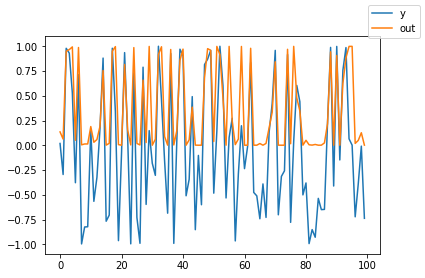

In [11]:
    _, a_s = nn.feedforward(X)
    #print(y, X)
    plt.plot(y.flatten()[:100])
    plt.plot( a_s[-1].flatten()[:100])
    plt.figlegend(['y','out'])
    plt.show()

In [3]:
y.flatten()

array([ 0.93220147, -0.36660232, -0.9980597 , -0.99707082,  0.95931443,
       -0.16486399,  0.70291786,  0.59096477,  0.57637907,  0.62998031,
       -0.61192741, -0.15278272, -0.99753895, -0.63931963,  0.54617561,
       -0.478221  , -0.9753467 ,  0.96055241, -0.91373503, -0.55273461,
       -0.56582027,  0.98015958,  0.56772779,  0.83694085, -0.97091717,
       -0.6131951 ,  0.67671737, -0.03917701,  0.21120599, -0.76457228,
        0.45081974, -0.15227562, -0.23773286, -0.03448198, -0.84031402,
        0.40370018, -0.42741378,  0.70142027, -0.55870366, -0.50739226,
       -0.99136777, -0.98518148, -0.83426372,  0.91233488,  0.92675417,
        0.08054182,  0.02164489, -0.83733492, -0.92582987, -0.18741561,
        0.94594489, -0.19407309, -0.92835102,  0.80256881, -0.61573768,
        0.90210921,  0.93556826, -0.70776493, -0.78082962,  0.8348243 ,
       -0.91026017, -0.785538  ,  0.88875042, -0.61648484, -0.78239753,
        0.97509242,  0.92009024,  0.87832113, -0.62208319,  0.16